***Congressional Voting Dataset***

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df_vote=pd.read_csv('CongressionalVotingID.shuf.lrn.csv')
df_vote = df_vote.applymap(lambda x: 1 if x == 'y' else 0 if x == 'n' else x)

In [21]:
# filter the DataFrame by class == democrat
df_democrat = df_vote[df_vote['class'] == 'democrat']
unknown_count_d = df_democrat.apply(lambda x: x.eq('unknown').sum()).sum()
print(f"{round(100*unknown_count_d/((df_democrat.shape[0]-2)*(df_democrat.shape[0]-2)))} percent of the democratic votes are unknown ")



1 percent of the democratic votes are unknown 


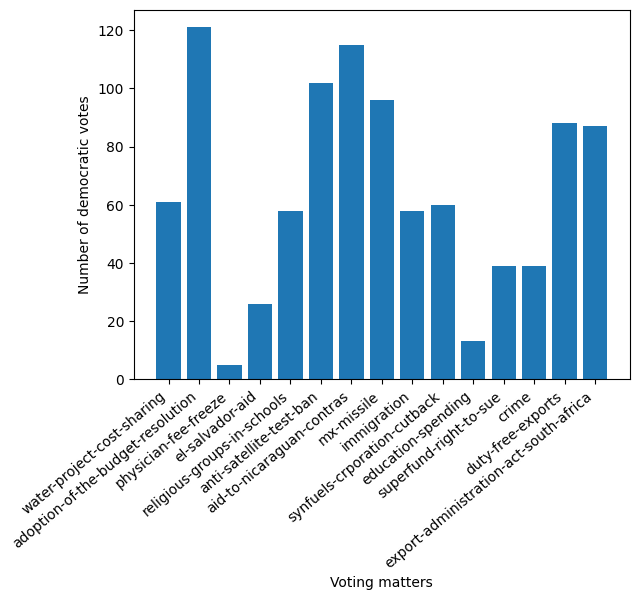

In [22]:
# plot a histogram of column1 for democrats
#df_democrat=df_democrat.replace('unknown',0)
df_democrat_T=df_democrat.transpose()
df_democrat_T=df_democrat_T[3:]
df_democrat_T= df_democrat_T.replace('unknown',pd.NA)
df_democrat_sum=df_democrat_T.sum(axis=1, skipna=True)
plt.bar(x=df_democrat_sum.index,height=df_democrat_sum)
plt.xticks(df_democrat_sum.index, rotation=40,horizontalalignment='right')
plt.xlabel('Voting matters')
plt.ylabel('Number of democratic votes')

# Display plot
plt.show()

Text(0, 0.5, 'Number of republican votes')

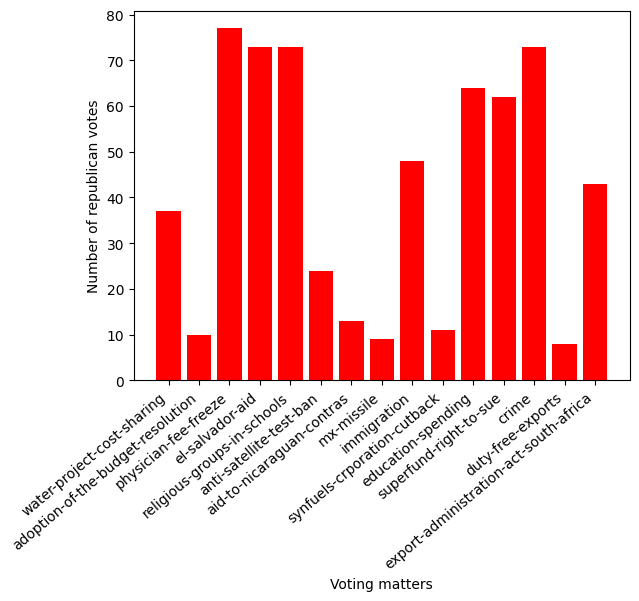

In [23]:
# filter the DataFrame by class == republican
df_republican = df_vote[df_vote['class'] == 'republican']
# unknown_count_d = df_republican.apply(lambda x: x.eq('unknown').sum()).sum()
# print(f"{round(100*unknown_count_d/((df_republican.shape[0]-2)*(df_republican.shape[0]-2)))} percent of the republican votes are unknown ")

# Bar plot for republicans
df_republican_T=df_republican.transpose()
df_republican_T=df_republican_T[3:]
df_republican_T= df_republican_T.replace('unknown',pd.NA)
df_republican_sum=df_republican_T.sum(axis=1, skipna=True)
plt.bar(x=df_republican_sum.index,height=df_republican_sum,color='red')
plt.xticks(df_republican_sum.index, rotation=40,horizontalalignment='right')
plt.xlabel('Voting matters')
plt.ylabel('Number of republican votes')

**Plot the difference between the sum of republican and democratic votes**

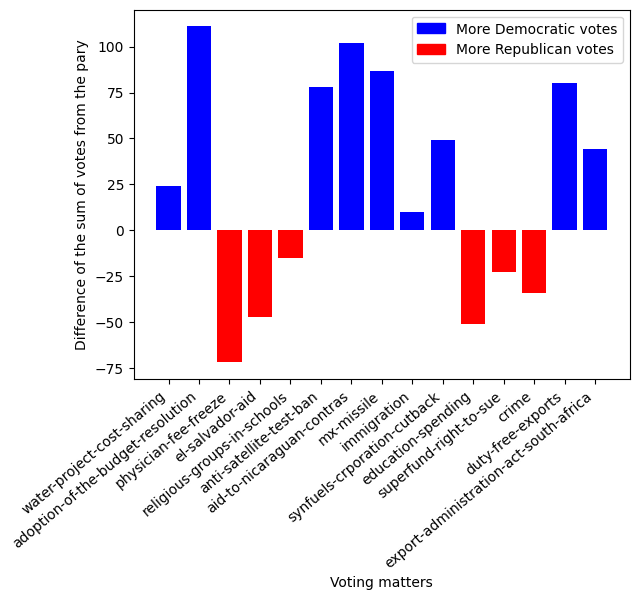

In [24]:
#Define colors
val=df_democrat_sum-df_republican_sum
colors = ['blue' if val >= 0 else 'red' for val in val]

plt.bar(x=df_republican_sum.index,height=df_democrat_sum-df_republican_sum,color=colors)
plt.xticks(df_republican_sum.index, rotation=40,horizontalalignment='right')
plt.xlabel('Voting matters')
plt.ylabel('Difference of the sum of votes from the pary')
# specify legend labels
legend_labels = {'blue': 'More Democratic votes', 'red': 'More Republican votes'}

# add legend
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in legend_labels.keys()],
           labels=[legend_labels[color] for color in legend_labels.keys()])


**Plot out three most distinguishing isses for democrats and for republicans**

In [25]:

n=0
for i in val.nlargest(3).index.values:
    n+=1
    print(f"No. {n} most distinguishing issues for democrats is {val.nlargest(3).index.values[n-1]}")
print()

n=0
for i in val.nlargest(3).index.values:
    n+=1
    print(f"No. {n} most distinguishing issues for republicans is {val.nsmallest(3).index.values[n-1]}")





No. 1 most distinguishing issues for democrats is adoption-of-the-budget-resolution
No. 2 most distinguishing issues for democrats is aid-to-nicaraguan-contras
No. 3 most distinguishing issues for democrats is mx-missile

No. 1 most distinguishing issues for republicans is physician-fee-freeze
No. 2 most distinguishing issues for republicans is education-spending
No. 3 most distinguishing issues for republicans is el-salvador-aid


**Create the training and validation dataset**

In [26]:
#Create x_train and y_train
df_vote=df_vote.replace('unknown',0)
x_train=df_vote.iloc[:,2:]
y_train=df_vote.iloc[:,1]


In [27]:
#Create x_val
df_test=pd.read_csv('CongressionalVotingID.shuf.tes.csv')
df_test = df_test.applymap(lambda x: 1 if x == 'y' else 0 if x == 'n' else x)
df_test=df_test.replace('unknown',0)
x_val=df_test.iloc[:, 1:]

In [28]:
#Create y_val
df_sol=pd.read_csv('CongressionalVotingID.shuf.sol.ex.csv')
df_sol = df_sol.applymap(lambda x: 1 if x == 'y' else 0 if x == 'n' else x)
y_val=df_sol['class']
y_val.unique()

array(['democrat'], dtype=object)

**kNN**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support

In [31]:
best_n=pd.NA
best_f1_sum=float('-inf')
for n in range(1,10):
    knn_model=KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(x_train,y_train )
    y_pred=knn_model.predict(x_val)
    precision, recall, f1_score, support = precision_recall_fscore_support(y_val, y_pred)
    if np.sum(f1_score)>best_f1_sum:
        best_n=n
        best_f1_sum=np.sum(f1_score)
    print(f1_score)
print(f"The best amount of neighbours is {best_n}")

[0.72352941 0.        ]
[0.75644699 0.        ]
[0.70833333 0.        ]
[0.72727273 0.        ]
[0.70833333 0.        ]
[0.71216617 0.        ]
[0.70447761 0.        ]
[0.70447761 0.        ]
[0.7005988 0.       ]
The best amount of neighbours is 2


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [32]:
# Perform cross-validation
knn_model=KNeighborsClassifier(n_neighbors=best_n)
scores = cross_val_score(knn_model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88636364 0.90909091 0.90909091 0.93023256 0.90697674]
Mean cross-validation score: 0.91


In [35]:
knn_model=KNeighborsClassifier(n_neighbors=best_n)
knn_model.fit(x_train,y_train )
y_pred=knn_model.predict(x_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

    democrat       1.00      0.61      0.76       217
  republican       0.00      0.00      0.00         0

    accuracy                           0.61       217
   macro avg       0.50      0.30      0.38       217
weighted avg       1.00      0.61      0.76       217



c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

**Naive Bayers**

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)
scores = cross_val_score(nb_model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88636364 0.95454545 0.90909091 0.93023256 0.97674419]
Mean cross-validation score: 0.93


In [203]:
y_val

0      democrat
1      democrat
2      democrat
3      democrat
4      democrat
         ...   
212    democrat
213    democrat
214    democrat
215    democrat
216    democrat
Name: class, Length: 217, dtype: object

In [39]:
y_pred= nb_model.predict(x_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

    democrat       1.00      0.54      0.70       217
  republican       0.00      0.00      0.00         0

    accuracy                           0.54       217
   macro avg       0.50      0.27      0.35       217
weighted avg       1.00      0.54      0.70       217



c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

**Log regression**

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lg_model=LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [42]:
y_pred=lg_model.predict(x_val)
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

    democrat       0.59      1.00      0.74       128
  republican       0.00      0.00      0.00        89

    accuracy                           0.59       217
   macro avg       0.29      0.50      0.37       217
weighted avg       0.35      0.59      0.44       217



c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

**Neural Network**

In [43]:
import tensorflow as tf

In [44]:
#Convert democrat to 1 and republican to 0
y_train_nn=y_train.replace('democrat',float(1))
y_train_nn=y_train_nn.replace('republican',float(0))
y_val_nn=y_val.replace('democrat',float(1))
y_val_nn=y_val_nn.replace('republican',float(0))


In [149]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.subplots_adjust(wspace=0.5) 
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)
    #plt.show()

    
    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracay')
    ax2.legend()
    ax2.grid(True)
    plt.show()

In [150]:
def train_model(x_train,y_train, num_nodes, dropout_prob,lr, batch_size, epochs):
    nn_model=tf.keras.Sequential([tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(16,)),
                              tf.keras.layers.Dropout(dropout_prob),
                             tf.keras.layers.Dense(num_nodes, activation='relu'),
                             tf.keras.layers.Dropout(dropout_prob),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy",metrics=['accuracy'])

    #x_train=x_train.astype(float)

    history = nn_model.fit(x_train,y_train_nn, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    plot_history(history)
    return nn_model, history

16 node, 0 dropout_prob, 0.01 lr, 32 batch_size


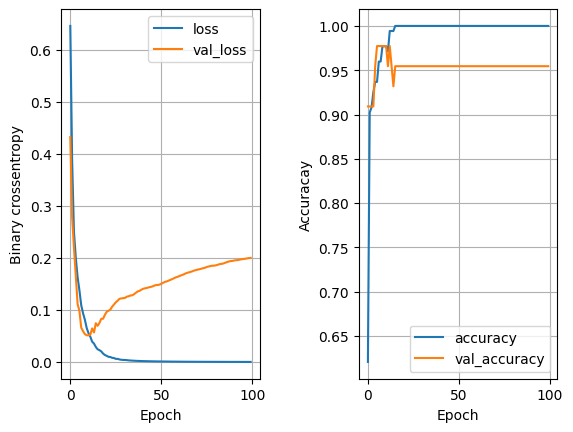

7/7 [==============================] - 0s 3ms/step - loss: 6.2654 - accuracy: 0.5668
16 node, 0 dropout_prob, 0.01 lr, 64 batch_size


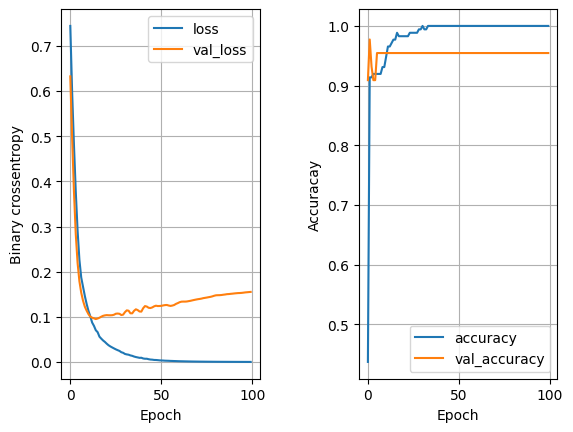

7/7 [==============================] - 0s 3ms/step - loss: 7.7512 - accuracy: 0.5622
16 node, 0 dropout_prob, 0.001 lr, 32 batch_size


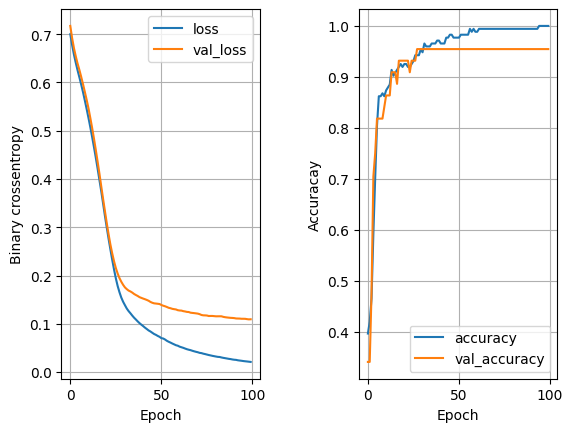

7/7 [==============================] - 0s 4ms/step - loss: 3.0266 - accuracy: 0.5576
16 node, 0 dropout_prob, 0.001 lr, 64 batch_size


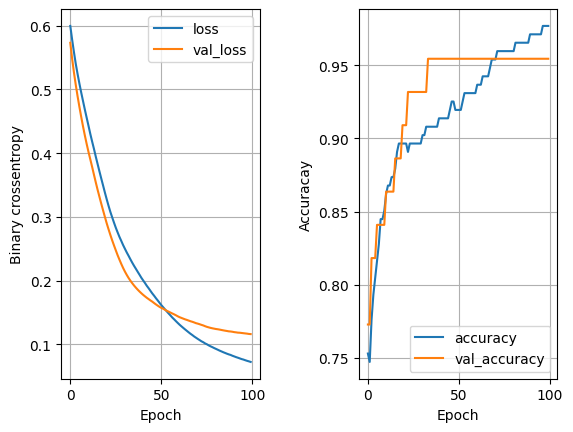

7/7 [==============================] - 0s 3ms/step - loss: 1.7140 - accuracy: 0.5530
16 node, 0.1 dropout_prob, 0.01 lr, 32 batch_size


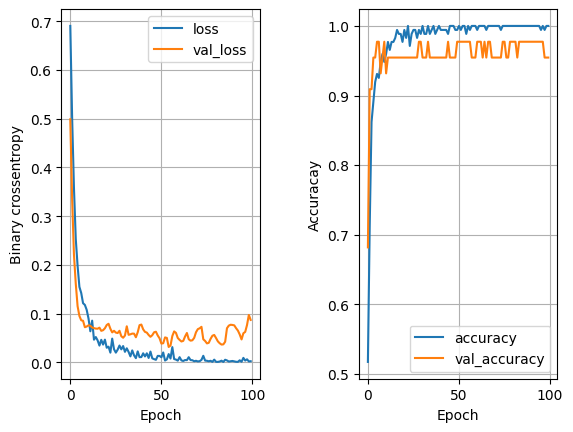

7/7 [==============================] - 0s 3ms/step - loss: 5.9088 - accuracy: 0.5576
16 node, 0.1 dropout_prob, 0.01 lr, 64 batch_size


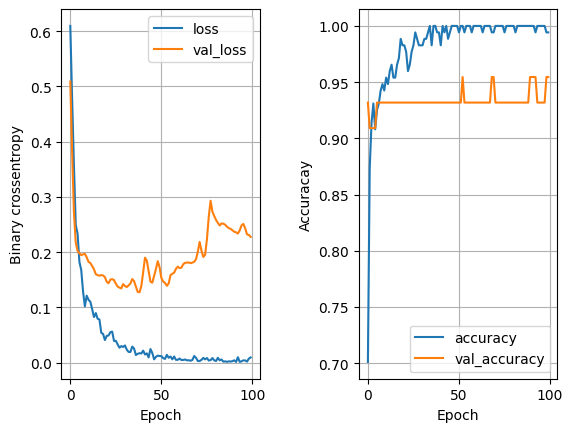

7/7 [==============================] - 0s 3ms/step - loss: 6.0181 - accuracy: 0.5576
16 node, 0.1 dropout_prob, 0.001 lr, 32 batch_size


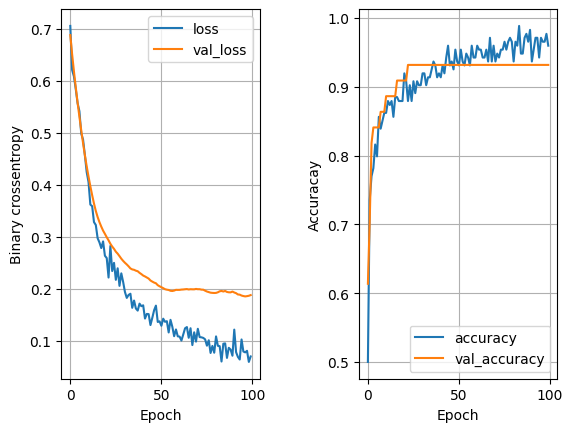

7/7 [==============================] - 0s 4ms/step - loss: 2.1557 - accuracy: 0.5530
16 node, 0.1 dropout_prob, 0.001 lr, 64 batch_size


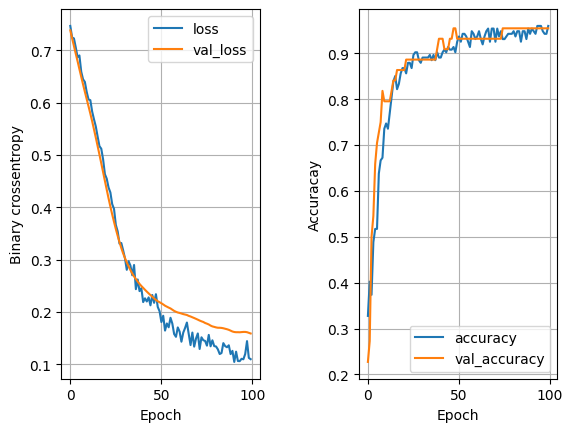

7/7 [==============================] - 0s 3ms/step - loss: 1.7134 - accuracy: 0.5668
32 node, 0 dropout_prob, 0.01 lr, 32 batch_size


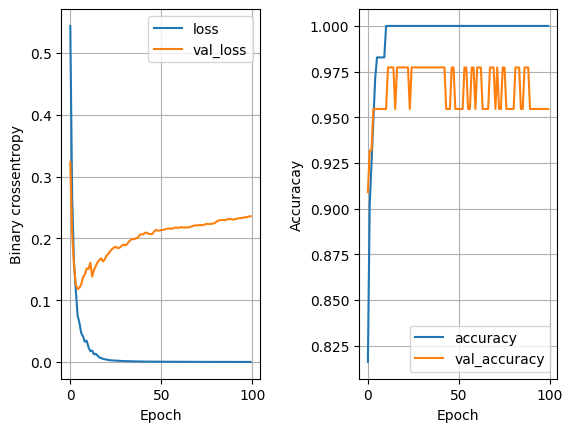

7/7 [==============================] - 0s 3ms/step - loss: 6.9710 - accuracy: 0.5806
32 node, 0 dropout_prob, 0.01 lr, 64 batch_size


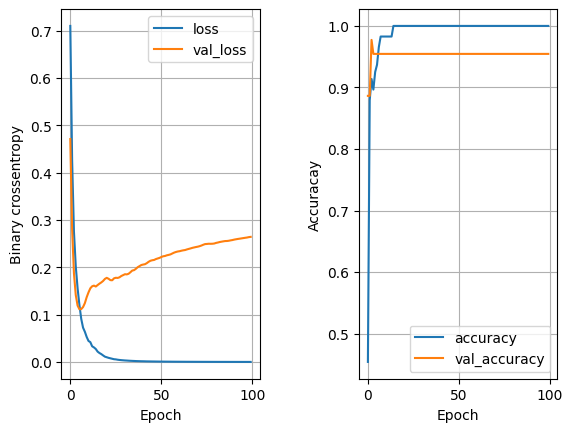

7/7 [==============================] - 0s 2ms/step - loss: 8.2141 - accuracy: 0.5530
32 node, 0 dropout_prob, 0.001 lr, 32 batch_size


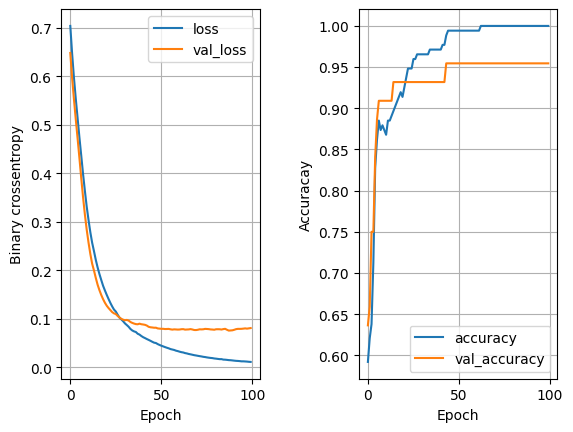

7/7 [==============================] - 0s 4ms/step - loss: 3.1196 - accuracy: 0.5714
32 node, 0 dropout_prob, 0.001 lr, 64 batch_size


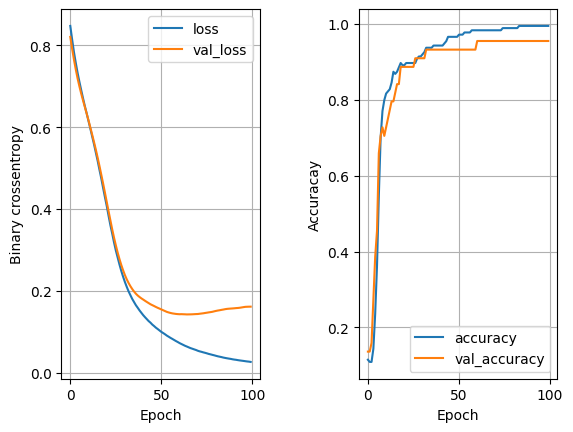

7/7 [==============================] - 0s 3ms/step - loss: 2.6545 - accuracy: 0.5576
32 node, 0.1 dropout_prob, 0.01 lr, 32 batch_size


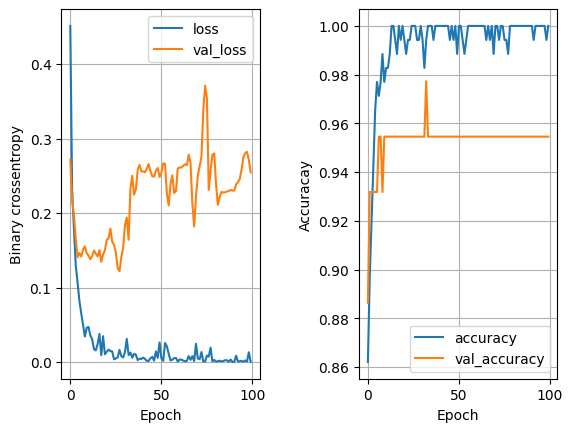

7/7 [==============================] - 0s 3ms/step - loss: 6.7309 - accuracy: 0.5760
32 node, 0.1 dropout_prob, 0.01 lr, 64 batch_size


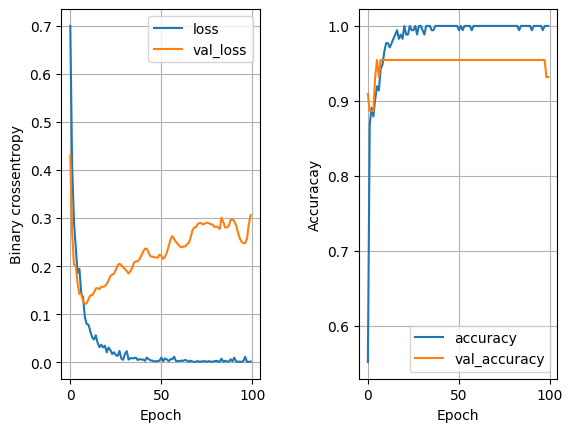

7/7 [==============================] - 0s 3ms/step - loss: 6.8775 - accuracy: 0.5300
32 node, 0.1 dropout_prob, 0.001 lr, 32 batch_size


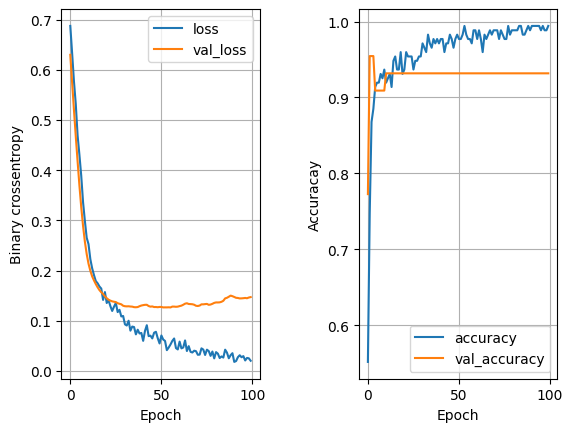

7/7 [==============================] - 0s 6ms/step - loss: 2.8631 - accuracy: 0.5622
32 node, 0.1 dropout_prob, 0.001 lr, 64 batch_size


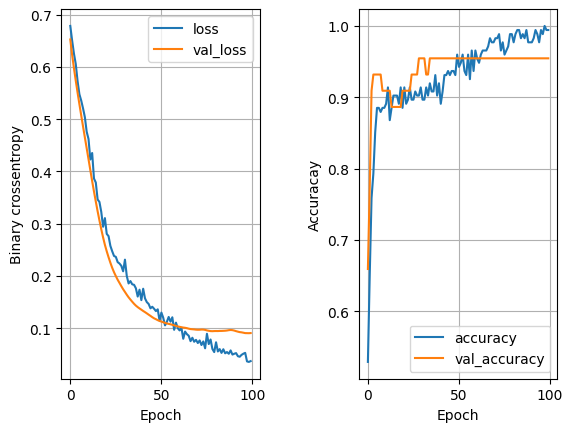

7/7 [==============================] - 0s 3ms/step - loss: 2.4998 - accuracy: 0.5806
The best model is <keras.engine.sequential.Sequential object at 0x0000014962837210> with the val_loss of 1.7133797407150269
16 node, 0.1 dropout_prob, 0.001 lr, 64 batch_size


In [152]:
least_val_loss = float('inf')
least_val_model = None
epochs=100
string=None
for num_nodes in [16,32]:
    for dropout_prob in [0,0.1,]:
        for lr in [0.01 , 0.001]:
            for batch_size in [32, 64]:
                print(f"{num_nodes} node, {dropout_prob} dropout_prob, {lr} lr, {batch_size} batch_size")
                nn_model, history= train_model(x_train,y_train, num_nodes, dropout_prob,lr, batch_size, epochs)
                #plot_history(history)
                val_loss=nn_model.evaluate(x_val,y_val_nn)[0]
                if val_loss<least_val_loss:
                    least_val_loss=val_loss
                    least_val_model=nn_model
                    string=f"{num_nodes} node, {dropout_prob} dropout_prob, {lr} lr, {batch_size} batch_size"
print(f"The best model is {least_val_model} with the val_loss of {least_val_loss}")
print(string)

In [154]:
y_pred=least_val_model.predict(x_val)
y_pred=(y_pred>0.5).astype(int).reshape(-1)
y_pred


print(classification_report(y_val_nn,y_pred))

7/7 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.57      0.72       217

    accuracy                           0.57       217
   macro avg       0.50      0.28      0.36       217
weighted avg       1.00      0.57      0.72       217



c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

**Random Forst**

In [213]:
#Import everything necessary
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [214]:
best_n=pd.NA
best_f1_sum=float('-inf')
for n in range(10,100,10):
    rfc = RandomForestClassifier(n_estimators=n, random_state=26)
    rfc.fit(x_train, y_train)
    # Make predictions on the test set
    y_pred = rfc.predict(x_val)
    precision, recall, f1_score, support = precision_recall_fscore_support(y_val, y_pred)
    if np.sum(f1_score)>best_f1_sum:
        best_n=n
        best_f1_sum=np.sum(f1_score)
    print(f1_score)
print(f"The best n_estimator is {best_n}")

c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

[0.73099415 0.        ]
[0.72352941 0.        ]
[0.72727273 0.        ]
[0.72352941 0.        ]
[0.72352941 0.        ]


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

[0.72352941 0.        ]
[0.72352941 0.        ]
[0.71976401 0.        ]
[0.72352941 0.        ]
The best n_estimator is 10


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
# Perform cross-validation
rfc = RandomForestClassifier(n_estimators=best_n, random_state=26)
rfc.fit(x_train, y_train)
scores = cross_val_score(rfc ,x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.90909091 0.95454545 0.93181818 0.97674419 0.95348837]
Mean cross-validation score: 0.95


In [216]:
# Make predictions on the test set
y_pred = rfc.predict(x_val)

# Evaluate the model
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

    democrat       1.00      0.58      0.73       217
  republican       0.00      0.00      0.00         0

    accuracy                           0.58       217
   macro avg       0.50      0.29      0.37       217
weighted avg       1.00      0.58      0.73       217



c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le